In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img= image.load_img(r'C:\Users\menna\OneDrive\Desktop\Dataset\training\Accessories\1.jpg')

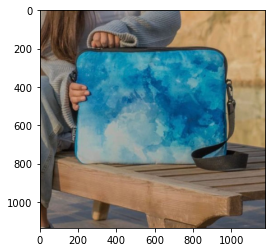

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r'C:\Users\menna\OneDrive\Desktop\Dataset\training\Accessories\1.jpg')

array([[[144, 160, 172],
        [144, 160, 172],
        [143, 159, 171],
        ...,
        [119, 171, 211],
        [119, 171, 211],
        [119, 171, 211]],

       [[143, 159, 171],
        [143, 159, 171],
        [143, 159, 171],
        ...,
        [121, 173, 213],
        [121, 173, 213],
        [121, 173, 213]],

       [[141, 155, 167],
        [142, 156, 168],
        [139, 155, 167],
        ...,
        [120, 172, 212],
        [120, 172, 212],
        [120, 172, 212]],

       ...,

       [[138, 162, 186],
        [138, 162, 184],
        [139, 161, 186],
        ...,
        [ 96,  84,  78],
        [ 96,  84,  78],
        [ 96,  84,  78]],

       [[140, 163, 185],
        [139, 163, 183],
        [140, 163, 185],
        ...,
        [ 94,  82,  76],
        [ 94,  82,  76],
        [ 94,  82,  76]],

       [[143, 167, 187],
        [144, 168, 188],
        [145, 169, 189],
        ...,
        [ 92,  80,  74],
        [ 92,  80,  74],
        [ 92,  80,  74]]

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset= train.flow_from_directory(r'C:\Users\menna\OneDrive\Desktop\Dataset\training', 
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')

validation_dataset= validation.flow_from_directory(r'C:\Users\menna\OneDrive\Desktop\Dataset\validation', 
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')

Found 22 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [7]:
model= tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Flatten(),
                                   
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])
                                  

In [8]:
model.compile(loss= 'binary_crossentropy',
             optimizer= RMSprop(lr=0.001) ,
             metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                   steps_per_epoch = 5,
                   epochs=15,
                   validation_data=validation_dataset)

Epoch 1/15
5/5 [==============================] - 4s 615ms/step - loss: 6.6790 - accuracy: 0.5385 - val_loss: 0.7607 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 3s 514ms/step - loss: 0.9605 - accuracy: 0.3846 - val_loss: 0.6771 - val_accuracy: 0.7500
Epoch 3/15
5/5 [==============================] - 2s 462ms/step - loss: 0.6885 - accuracy: 0.5385 - val_loss: 0.6501 - val_accuracy: 0.5833
Epoch 4/15
5/5 [==============================] - 2s 487ms/step - loss: 0.6744 - accuracy: 0.5385 - val_loss: 0.5992 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 3s 552ms/step - loss: 0.6307 - accuracy: 0.6000 - val_loss: 0.4544 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 2s 497ms/step - loss: 0.4332 - accuracy: 0.8462 - val_loss: 1.2116 - val_accuracy: 0.5000
Epoch 7/15
5/5 [==============================] - 2s 488ms/step - loss: 1.1514 - accuracy: 0.6923 - val_loss: 0.8201 - val_accuracy: 0.5833
Epoch 8/15
5/5 [====

In [10]:
validation_dataset.class_indices

{'Accessories': 0, 'Fashion': 1}

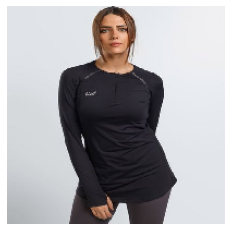

1/1 [==============================] - 0s 34ms/step
Image: 1.jpg - Class: Fashion


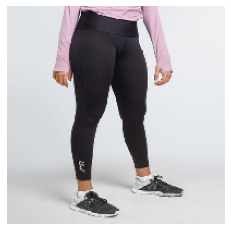

1/1 [==============================] - 0s 32ms/step
Image: 11.jpg - Class: Fashion


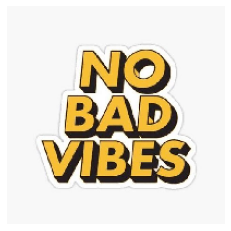

1/1 [==============================] - 0s 44ms/step
Image: 12.jpg - Class: Accessories


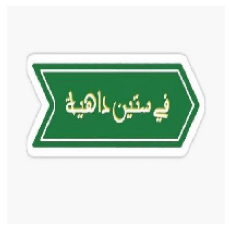

1/1 [==============================] - 0s 36ms/step
Image: 5.jpg - Class: Accessories


In [25]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r'C:\Users\menna\OneDrive\Desktop\Dataset\testing'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Image:", i, "- Class: Accessories")
    else:
        print("Image:", i, "- Class: Fashion")
